# Fake news Detection

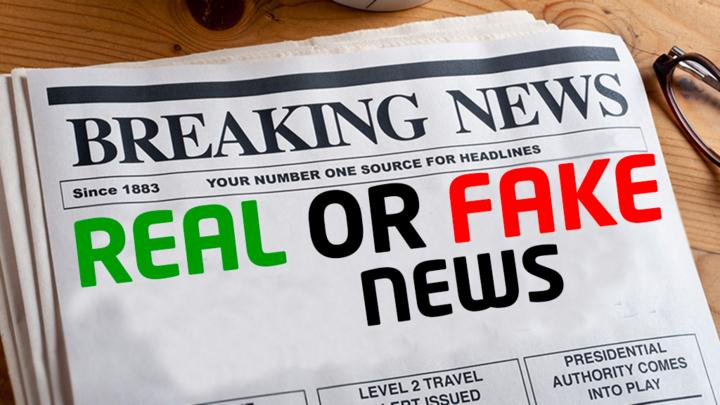

### Importing required library
Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

### Inserting fake and real dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-9-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-9-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [10]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [12]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [13]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df_marge['text'] = df_marge['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\Radley
[nltk_data]     Roy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


subject
Government News     1570
Middle-east          768
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


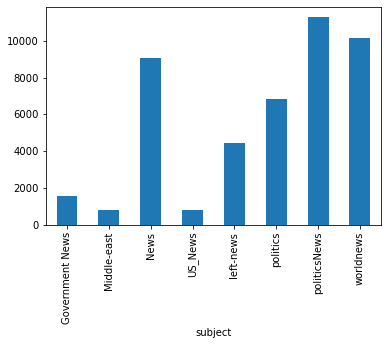

In [16]:
print(df_marge.groupby(['subject'])['text'].count())
df_marge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64


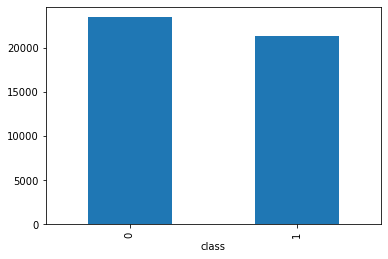

In [17]:
print(df_marge.groupby(['class'])['text'].count())
df_marge.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

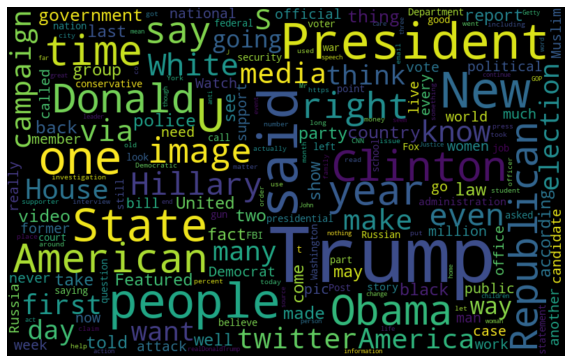

In [18]:
from wordcloud import WordCloud

fake_data = df_marge[df_marge["class"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

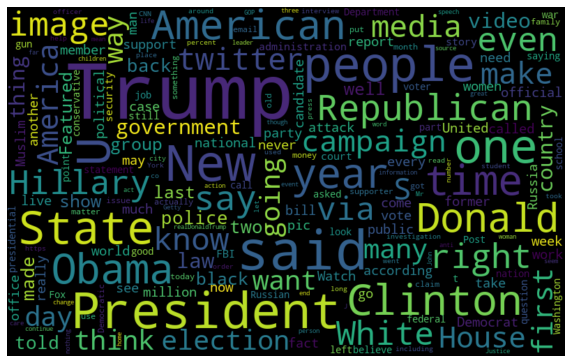

In [19]:
from wordcloud import WordCloud

real_data = df_marge[df_marge["class"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
import nltk
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

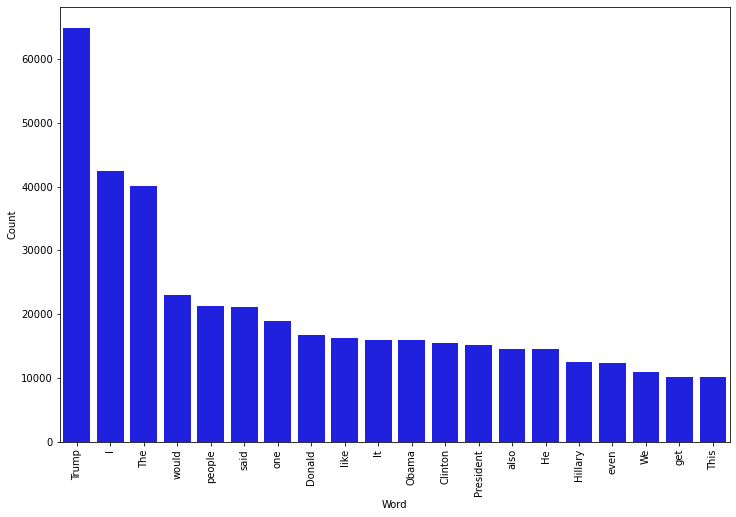

In [21]:
counter(df_marge[df_marge["class"] == 0], "text", 20)

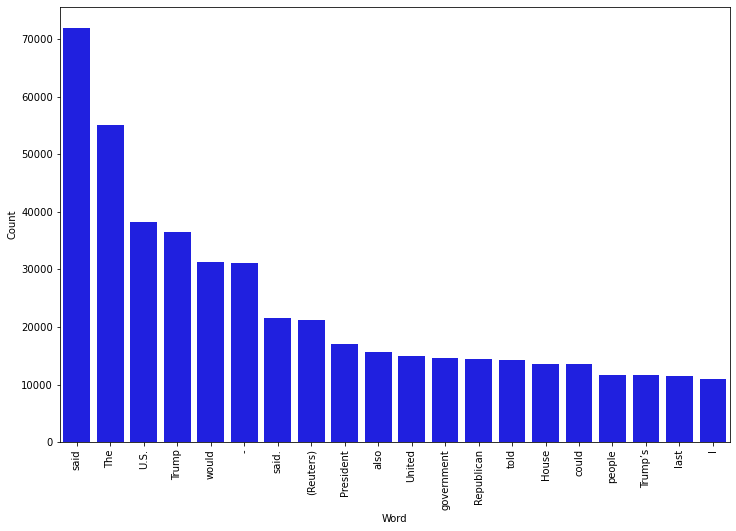

In [22]:
counter(df_marge[df_marge["class"] == 1], "text", 20)

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [23]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [24]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [25]:
df = df.sample(frac = 1)

In [26]:
df.head()

,text,class
8938,"MONESSEN, Pennsylvania/WASHINGTON (Reuters) - ...",1
7382,Politifact humiliated Senate Republicans big t...,0
6619,(Reuters) - The U.S. Congress consider overhau...,1
1868,WASHINGTON (Reuters) - The U.S. House Represen...,1
5624,WASHINGTON (Reuters) - The United States inves...,1


In [27]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [28]:
df.columns

Index(['text', 'class'], dtype='object')

In [29]:
df.head()

,text,class
0,"MONESSEN, Pennsylvania/WASHINGTON (Reuters) - ...",1
1,Politifact humiliated Senate Republicans big t...,0
2,(Reuters) - The U.S. Congress consider overhau...,1
3,WASHINGTON (Reuters) - The U.S. House Represen...,1
4,WASHINGTON (Reuters) - The United States inves...,1


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [30]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [31]:
df["text"] = df["text"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [32]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
'''LR = LogisticRegression(C=29.763514416313132, max_iter=500, penalty='l1',
                   solver='liblinear')'''
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [38]:
pred_lr=LR.predict(xv_test)

In [39]:
print(round(LR.score(xv_test, y_test)*100,2),"%")

98.7 %


In [40]:
# param_grid = [    
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag'],
#     'max_iter' : [100, 500]
#     }
# ]

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# clf = GridSearchCV(LR, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [43]:
# best_clf = clf.fit(xv_train,y_train)

In [44]:
# best_clf.best_estimator_

In [45]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


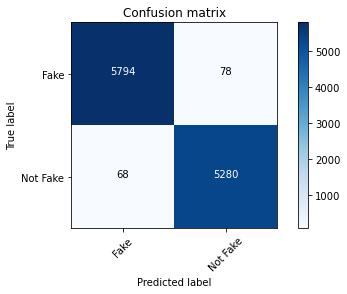

In [46]:
cm_lr = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm_lr, classes=['Fake', 'Not Fake'])

In [47]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5872
           1       0.99      0.99      0.99      5348

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### 2. Decision Tree Classification

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
# DT = DecisionTreeClassifier(criterion='entropy', max_depth=40)
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [50]:
# tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
# clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, verbose=True, n_jobs=-1)
# best_clf = clf.fit(xv_train,y_train)

In [51]:
# best_clf.best_estimator_

In [52]:
pred_dt = DT.predict(xv_test)

In [53]:
print(round(DT.score(xv_test, y_test)*100,2),"%")

99.54 %


Confusion matrix, without normalization


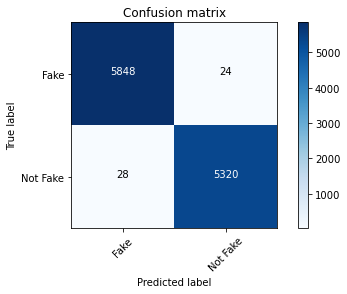

In [54]:
cm_dt = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm_dt, classes=['Fake', 'Not Fake'])

In [55]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5872
           1       1.00      0.99      1.00      5348

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### 3. Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [58]:
pred_gbc = GBC.predict(xv_test)

In [59]:
print(round(GBC.score(xv_test, y_test)*100,2),"%")

99.47 %


Confusion matrix, without normalization


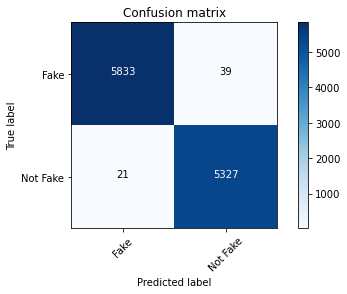

In [60]:
cm_gbc = metrics.confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(cm_gbc, classes=['Fake', 'Not Fake'])

In [61]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5872
           1       0.99      1.00      0.99      5348

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### 4. Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [64]:
# random_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
# clf = GridSearchCV(RandomForestClassifier(), random_grid, cv=3, verbose=True, n_jobs=-1)
# best_clf = clf.fit(xv_train,y_train)

In [65]:
# best_clf.best_estimator_

In [66]:
pred_rfc = RFC.predict(xv_test)

In [67]:
print(round(RFC.score(xv_test, y_test)*100,2),"%")

99.05 %


Confusion matrix, without normalization


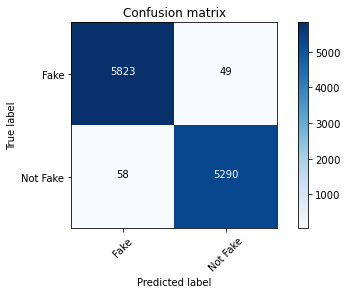

In [68]:
cm_rfc = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm_rfc, classes=['Fake', 'Not Fake'])

In [69]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5872
           1       0.99      0.99      0.99      5348

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Model Testing With Manual Entry

### News

In [70]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    prob_LR = round(LR.predict_proba(new_xv_test)[0][0]*100,2)
    prob_DT = round(DT.predict_proba(new_xv_test)[0][0]*100,2)
    prob_GBC = round(GBC.predict_proba(new_xv_test)[0][0]*100,2)
    prob_RFC = round(RFC.predict_proba(new_xv_test)[0][0]*100,2)

    return print("\n\nLR Prediction: {} as {} \nDT Prediction: {} as {} \nGBC Prediction: {} as {} \nRFC Prediction: {} as {}".format(output_lable(pred_LR[0]), prob_LR,
                                                                                                              output_lable(pred_DT[0]), prob_DT,
                                                                                                              output_lable(pred_GBC[0]), prob_GBC,
                                                                                                              output_lable(pred_RFC[0]), prob_RFC))

In [71]:
import numpy as np
from flask import Flask, request,render_template
from flask_cors import CORS
import os
import flask
import newspaper
from newspaper import Article
import urllib
import joblib

In [72]:
app = Flask(__name__)
CORS(app)
app=flask.Flask(__name__,template_folder='templates')

@app.route('/')
def main():
    return render_template('main.html')

@app.route('/predict',methods=['GET','POST'])
def predict():
    url =request.get_data(as_text=True)[5:]
    url = urllib.parse.unquote(url)
    article = Article(str(url))
    article.download()
    article.parse()
    article.nlp()
    news = article.summary
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    prob_LR = round(LR.predict_proba(new_xv_test)[0][0]*100,2)
    prob_DT = round(DT.predict_proba(new_xv_test)[0][0]*100,2)
    prob_GBC = round(GBC.predict_proba(new_xv_test)[0][0]*100,2)
    prob_RFC = round(RFC.predict_proba(new_xv_test)[0][0]*100,2)
    check_LR = False
    check_RFC = False
    check = True
    if prob_LR <= 80:
        check_LR = True
    if prob_RFC <= 70:
        check_RFC = True
    return render_template('main.html', check=check, check_LR = check_LR, check_RFC = check_RFC, LR = prob_LR, DT = prob_DT, GBC = prob_GBC, RFC = prob_RFC)
    
if __name__=="__main__":
    port=int(os.environ.get('PORT',5000))
    app.run(port=port,debug=True,use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [73]:
# filename_LR = 'LR_model.sav'
# filename_DT = 'DT_model.sav'
# filename_GBC = 'GBC_model.sav'
# filename_RFC = 'RFC_model.sav'
# filename_tfidf = 'tfidf_model.sav'

In [74]:
# joblib.dump(LR, filename_LR)
# joblib.dump(DT, filename_DT)
# joblib.dump(GBC, filename_GBC)
# joblib.dump(RFC, filename_RFC)
# joblib.dump(vectorization, filename_tfidf)